In [35]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import export_graphviz
import graphviz
from IPython.display import Image, display
import warnings

import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
RANDOM_STATE = 42

In [37]:
pd.set_option('display.max_rows', None)       # show all rows of a Series/DataFrame
pd.set_option('display.max_columns', None)    # show all columns if printing a DataFrame

warnings.filterwarnings("ignore")

In [38]:
df = pd.read_csv("/content/DataSetForPhishingVSBenignUrl.csv")
df.head()

,Querylength,domain_token_count,path_token_count,avgdomaintokenlen,longdomaintokenlen,avgpathtokenlen,tld,charcompvowels,charcompace,ldl_url,ldl_domain,ldl_path,ldl_filename,ldl_getArg,dld_url,dld_domain,dld_path,dld_filename,dld_getArg,urlLen,domainlength,pathLength,subDirLen,fileNameLen,this.fileExtLen,ArgLen,pathurlRatio,ArgUrlRatio,argDomanRatio,domainUrlRatio,pathDomainRatio,argPathRatio,executable,isPortEighty,NumberofDotsinURL,ISIpAddressInDomainName,CharacterContinuityRate,LongestVariableValue,URL_DigitCount,host_DigitCount,Directory_DigitCount,File_name_DigitCount,Extension_DigitCount,Query_DigitCount,URL_Letter_Count,host_letter_count,Directory_LetterCount,Filename_LetterCount,Extension_LetterCount,Query_LetterCount,LongestPathTokenLength,Domain_LongestWordLength,Path_LongestWordLength,sub-Directory_LongestWordLength,Arguments_LongestWordLength,URL_sensitiveWord,URLQueries_variable,spcharUrl,delimeter_Domain,delimeter_path,delimeter_Count,NumberRate_URL,NumberRate_Domain,NumberRate_DirectoryName,NumberRate_FileName,NumberRate_Extension,NumberRate_AfterPath,SymbolCount_URL,SymbolCount_Domain,SymbolCount_Directoryname,SymbolCount_FileName,SymbolCount_Extension,SymbolCount_Afterpath,Entropy_URL,Entropy_Domain,Entropy_DirectoryName,Entropy_Filename,Entropy_Extension,Entropy_Afterpath,URL_Type_obf_Type
0,0,4,5,5.5,14,4.400000,4,8,3,0,0,0,0,0,0,0,0,0,0,58,25,26,26,13,1,2,0.448276,0.034483,0.08,0.431034,1.04,0.076923,0,-1,5,-1,0.6,-1,1,0,0,0,1,-1,47,22,8,13,0,-1,13,14,13,5,-1,0,0,3,0,2,-1,0.017241,0.0,0.0,0.066667,1.0,-1.0,8,3,2,1,0,-1,0.726298,0.784493,0.894886,0.850608,NaN,-1.0,Defacement
1,0,4,5,5.5,14,6.000000,4,12,4,0,0,0,0,0,0,0,0,0,0,66,25,34,34,2,2,2,0.515151,0.030303,0.08,0.378788,1.36,0.058824,0,-1,4,-1,0.6,-1,0,0,0,0,0,-1,56,22,8,13,9,-1,13,14,13,5,-1,0,0,4,0,1,-1,0.000000,0.0,0.0,0.000000,NaN,-1.0,8,3,3,0,0,-1,0.688635,0.784493,0.814725,0.859793,0.0,-1.0,Defacement
2,0,4,5,5.5,14,5.800000,4,12,5,0,0,0,0,0,0,0,0,0,0,65,25,33,33,2,2,2,0.507692,0.030769,0.08,0.384615,1.32,0.060606,0,-1,4,-1,0.6,-1,0,0,0,0,0,-1,55,22,8,13,8,-1,13,14,13,5,-1,0,0,4,0,1,-1,0.000000,0.0,0.0,0.000000,NaN,-1.0,8,3,3,0,0,-1,0.695049,0.784493,0.814725,0.801880,0.0,-1.0,Defacement
3,0,4,12,5.5,14,5.500000,4,32,16,0,0,0,0,0,0,0,0,0,0,109,25,77,77,2,2,2,0.706422,0.018349,0.08,0.229358,3.08,0.025974,0,-1,4,-1,0.6,-1,0,0,0,0,0,-1,92,22,8,13,45,-1,52,14,13,13,-1,0,0,4,0,8,-1,0.000000,0.0,0.0,0.000000,NaN,-1.0,8,3,3,0,0,-1,0.640130,0.784493,0.814725,0.663210,0.0,-1.0,Defacement
4,0,4,6,5.5,14,7.333334,4,18,11,0,0,0,0,0,0,0,0,0,0,81,25,49,49,2,2,2,0.604938,0.024691,0.08,0.308642,1.96,0.040816,0,-1,4,-1,0.6,-1,0,0,0,0,0,-1,70,22,8,13,23,-1,24,14,13,13,-1,0,0,4,0,2,-1,0.000000,0.0,0.0,0.000000,NaN,-1.0,8,3,3,0,0,-1,0.681307,0.784493,0.814725,0.804526,0.0,-1.0,Defacement


In [39]:
print(df.columns)

Index(['Querylength', 'domain_token_count', 'path_token_count',
       'avgdomaintokenlen', 'longdomaintokenlen', 'avgpathtokenlen', 'tld',
       'charcompvowels', 'charcompace', 'ldl_url', 'ldl_domain', 'ldl_path',
       'ldl_filename', 'ldl_getArg', 'dld_url', 'dld_domain', 'dld_path',
       'dld_filename', 'dld_getArg', 'urlLen', 'domainlength', 'pathLength',
       'subDirLen', 'fileNameLen', 'this.fileExtLen', 'ArgLen', 'pathurlRatio',
       'ArgUrlRatio', 'argDomanRatio', 'domainUrlRatio', 'pathDomainRatio',
       'argPathRatio', 'executable', 'isPortEighty', 'NumberofDotsinURL',
       'ISIpAddressInDomainName', 'CharacterContinuityRate',
       'LongestVariableValue', 'URL_DigitCount', 'host_DigitCount',
       'Directory_DigitCount', 'File_name_DigitCount', 'Extension_DigitCount',
       'Query_DigitCount', 'URL_Letter_Count', 'host_letter_count',
       'Directory_LetterCount', 'Filename_LetterCount',
       'Extension_LetterCount', 'Query_LetterCount', 'LongestPathToken

In [40]:
df['URL_Type_obf_Type'].value_counts()

,count
URL_Type_obf_Type,
Defacement,7930
benign,7781
phishing,7586
malware,6712
spam,6698


In [41]:
# label encode URL_Type_obf_Type
le = LabelEncoder()
df['label'] = le.fit_transform(df['URL_Type_obf_Type'])

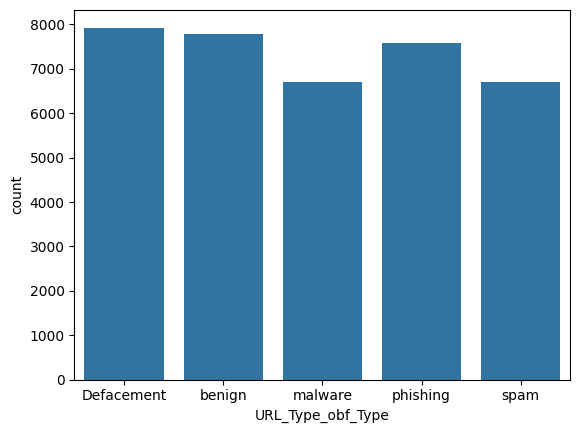

In [42]:
sns.countplot(x='URL_Type_obf_Type', data=df)
plt.show()

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36707 entries, 0 to 36706
Data columns (total 81 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Querylength                      36707 non-null  int64  
 1   domain_token_count               36707 non-null  int64  
 2   path_token_count                 36707 non-null  int64  
 3   avgdomaintokenlen                36707 non-null  float64
 4   longdomaintokenlen               36707 non-null  int64  
 5   avgpathtokenlen                  36427 non-null  float64
 6   tld                              36707 non-null  int64  
 7   charcompvowels                   36707 non-null  int64  
 8   charcompace                      36707 non-null  int64  
 9   ldl_url                          36707 non-null  int64  
 10  ldl_domain                       36707 non-null  int64  
 11  ldl_path                         36707 non-null  int64  
 12  ldl_filename      

In [ ]:
df.isnull().sum()

,0
Querylength,0
domain_token_count,0
path_token_count,0
avgdomaintokenlen,0
longdomaintokenlen,0
avgpathtokenlen,280
tld,0
charcompvowels,0
charcompace,0
ldl_url,0


In [45]:
missing = df.isnull().sum()
missing_pct = (missing / len(df) * 100).sort_values(ascending=False)
missing_df =pd.concat([missing, missing_pct], axis=1, keys=['count','pct'])
missing_df.sort_values(by='count', ascending=False).head(10)

,count,pct
NumberRate_Extension,10130,27.596916
Entropy_DirectoryName,8468,23.069169
avgpathtokenlen,280,0.762797
Entropy_Filename,236,0.642929
Entropy_Extension,40,0.108971
NumberRate_FileName,10,0.027243
NumberRate_DirectoryName,10,0.027243
Entropy_Afterpath,6,0.016346
NumberRate_AfterPath,3,0.008173
Querylength,0,0.000000


In [46]:
corr = df.select_dtypes(include='number').corr()['label'].sort_values(ascending=False)
print(corr.head(10))

label                        1.000000
SymbolCount_Directoryname    0.329266
dld_url                      0.301209
dld_path                     0.301100
SymbolCount_Domain           0.294999
tld                          0.294414
domain_token_count           0.294414
URL_DigitCount               0.287118
Extension_DigitCount         0.283349
dld_getArg                   0.263688
Name: label, dtype: float64


In [47]:
# Due to low correlation, we can drop NumberRate_Extension and Entropy_DirectoryName columns
high_missing_cols = ['NumberRate_Extension', 'Entropy_DirectoryName']
df.drop(columns=high_missing_cols, inplace=True)

In [48]:
# Other columns with missing values have very low missing %, so fill with median
low_missing_cols = ['avgpathtokenlen', 'Entropy_Filename', 'Entropy_Extension', 'NumberRate_DirectoryName', 'NumberRate_FileName', 'Entropy_Afterpath', 'NumberRate_AfterPath', 'Querylength']
df[low_missing_cols] = df[low_missing_cols].fillna(df[low_missing_cols].median())

In [49]:
df.describe()

,Querylength,domain_token_count,path_token_count,avgdomaintokenlen,longdomaintokenlen,avgpathtokenlen,tld,charcompvowels,charcompace,ldl_url,ldl_domain,ldl_path,ldl_filename,ldl_getArg,dld_url,dld_domain,dld_path,dld_filename,dld_getArg,urlLen,domainlength,pathLength,subDirLen,fileNameLen,this.fileExtLen,ArgLen,pathurlRatio,ArgUrlRatio,argDomanRatio,domainUrlRatio,pathDomainRatio,argPathRatio,executable,isPortEighty,NumberofDotsinURL,ISIpAddressInDomainName,CharacterContinuityRate,LongestVariableValue,URL_DigitCount,host_DigitCount,Directory_DigitCount,File_name_DigitCount,Extension_DigitCount,Query_DigitCount,URL_Letter_Count,host_letter_count,Directory_LetterCount,Filename_LetterCount,Extension_LetterCount,Query_LetterCount,LongestPathTokenLength,Domain_LongestWordLength,Path_LongestWordLength,sub-Directory_LongestWordLength,Arguments_LongestWordLength,URL_sensitiveWord,URLQueries_variable,spcharUrl,delimeter_Domain,delimeter_path,delimeter_Count,NumberRate_URL,NumberRate_Domain,NumberRate_DirectoryName,NumberRate_FileName,NumberRate_AfterPath,SymbolCount_URL,SymbolCount_Domain,SymbolCount_Directoryname,SymbolCount_FileName,SymbolCount_Extension,SymbolCount_Afterpath,Entropy_URL,Entropy_Domain,Entropy_Filename,Entropy_Extension,Entropy_Afterpath,label
count,36707.000000,36707.000000,36707.000000,36707.000000,36707.000000,36707.000000,36707.000000,36707.000000,36707.000000,36707.000000,36707.000000,36707.000000,36707.000000,36707.000000,36707.000000,36707.000000,36707.000000,36707.000000,36707.000000,36707.000000,36707.000000,36707.00000,36707.00000,36707.000000,36707.000000,36707.000000,36707.000000,36707.000000,36707.000000,36707.000000,36707.000000,3.670700e+04,36707.000000,36707.000000,36707.000000,36707.0,36707.000000,36707.000000,36707.000000,36707.000000,36707.000000,36707.000000,36707.000000,36707.000000,36707.000000,36707.000000,36707.000000,36707.000000,36707.000000,36707.000000,36707.000000,36707.000000,36707.000000,36707.000000,36707.000000,36707.000000,36707.000000,36707.000000,36707.000000,36707.000000,36707.000000,36707.000000,36707.000000,36707.000000,36707.000000,36707.000000,36707.000000,36707.000000,36707.000000,36707.000000,36707.000000,36707.000000,36707.000000,36707.000000,36707.000000,36707.000000,36707.000000,36707.000000
mean,21.908110,2.857439,8.954668,5.401719,9.746016,4.552781,2.857439,14.976517,10.216117,3.363909,0.116517,3.244449,0.182663,2.395129,0.930204,0.007328,0.922876,0.061814,0.560111,92.945297,16.907320,69.05296,69.05296,6.815267,2.449070,34.344539,0.669962,0.236741,2.161321,0.232119,4.671155,inf,0.001389,-0.999619,2.866156,-1.0,0.623347,17.444956,10.474079,0.558395,1.213311,1.239001,6.874765,4.495491,68.165146,14.351323,10.902335,7.531969,29.923965,15.715912,48.241098,8.456725,8.529082,7.734138,2.070831,0.037214,1.297300,3.831885,0.139892,3.121094,1.682785,0.095546,0.037239,0.003767,0.103392,-0.475185,9.701882,1.856894,1.727545,3.600049,2.685237,1.903261,0.722350,0.842443,0.716280,0.508453,-0.209029,1.927562
std,94.280669,0.906562,4.278406,1.986858,4.856580,2.828816,0.906562,13.351315,10.845807,13.447289,0.606963,13.445774,1.112706,13.293604,2.692333,0.253727,2.675460,0.591369,2.301820,95.299612,7.648725,95.30716,95.30716,13.215634,0.785388,97.354275,0.159520,0.271793,6.423116,0.130322,6.480310,NaN,0.037249,0.019526,1.518403,0.0,0.161263,93.785703,18.034275,1.720052,4.842470,3.854567,17.343843,16.590541,79.002743,6.779777,15.592792,8.993364,80.159459,78.926758,95.155979,4.401473,3.521190,3.796621,5.361594,0.196213,2.071099,1.824176,0.458507,3.192752,4.229709,0.095776,0.104059,0.271787,0.333579,0.600195,5.054621,0.904671,2.719231,4.783213,4.557171,4.512421,0.048820,0.066251,0.410424,0.519463,0.891566,1.416854
min,0.000000,2.000000,0.000000,1.500000,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.000000,4.000000,0.00000,0.00000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.010534,0.000000,0.

In [50]:
# columns with -inf and inf values
inf_cols = df.columns[(df == np.inf).any() | (df == -np.inf).any()]
print(inf_cols)

Index(['argPathRatio'], dtype='object')


In [51]:
# count number of infs in inf_cols
for col in inf_cols:
    print(f"{col}: {np.isinf(df[col]).sum()}")

argPathRatio: 10


In [52]:
# Fill nan in rows with inf values since only 10 rows have infinity
df = df.replace([np.inf, -np.inf], np.nan).dropna(subset=inf_cols)

In [53]:
X = df.drop(columns=['URL_Type_obf_Type', 'label'])
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y)

In [54]:
print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")
print(f"Train label distribution:\n{y_train.value_counts(normalize=True)}")
print(f"Test label distribution:\n{y_test.value_counts(normalize=True)}")

Train shape: (29357, 77), Test shape: (7340, 77)
Train label distribution:
label
0    0.216098
1    0.212045
3    0.206458
2    0.182887
4    0.182512
Name: proportion, dtype: float64
Test label distribution:
label
0    0.216076
1    0.211989
3    0.206540
2    0.182834
4    0.182561
Name: proportion, dtype: float64


In [55]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), X.columns)
    ]
)

In [56]:
depths = [1, 2, 3, 4, 5, 6]
criterions = ['gini', 'entropy']
scores = {}

for depth in depths:
    for criterion in criterions:
        clf = Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('classifier', DecisionTreeClassifier(max_depth=depth, criterion=criterion, random_state=RANDOM_STATE))
        ])

        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        accuracy = clf.score(X_test, y_test)
        scores[(criterion, depth)] = accuracy
        print("\n")
        print(f"Decision Tree (criterion={criterion}, max_depth={depth})")
        print("\n")
        print("Accuracy:", accuracy)
        print("\n")
        print(confusion_matrix(y_test, y_pred))
        print("\n")
        print(classification_report(y_test, y_pred))
        print("-" * 50)
        print("\n")





Decision Tree (criterion=gini, max_depth=1)


Accuracy: 0.3760217983651226


[[   0  410    0    0 1176]
 [   0 1420    0    0  136]
 [   0  508    0    0  834]
 [   0  446    0    0 1070]
 [   0    0    0    0 1340]]


              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1586
           1       0.51      0.91      0.65      1556
           2       0.00      0.00      0.00      1342
           3       0.00      0.00      0.00      1516
           4       0.29      1.00      0.45      1340

    accuracy                           0.38      7340
   macro avg       0.16      0.38      0.22      7340
weighted avg       0.16      0.38      0.22      7340

--------------------------------------------------




Decision Tree (criterion=entropy, max_depth=1)


Accuracy: 0.3779291553133515


[[   0  395    0    0 1191]
 [   0 1445    0    0  111]
 [   0  537    0    0  805]
 [   0  726    0    0  790]
 [   0   11    0    0 1329]]


           

As the tree depth increased from 1 to 6, the overall accuracy and F1 scores improved steadily for both Gini and Entropy criteria. This pattern indicates that shallow trees underfit the data, as they cannot capture the complex relationships between URL-based features and the target classes. Starting from a depth of 3, the model begins to identify meaningful patterns, and by depth 5–6, the performance stabilizes around 80% accuracy, suggesting a good balance between model complexity and generalization.


Between the two splitting criteria, Gini consistently performed slightly better than Entropy, though the difference remained small. This is consistent with theory, as Gini tends to favor the most frequent classes and is computationally more efficient, while Entropy is more sensitive to class imbalance. Since the dataset likely contains uneven class distributions, Gini’s robustness offers a slight advantage in this case.


Class-wise results show that the model performs well on dominant classes like benign and phishing URLs but struggles with less frequent categories such as malware and defacement at lower depths. As the tree grows deeper, these minority classes become better represented, reducing misclassifications. Overall, a maximum depth of 5 or 6 provides the best trade-off between bias and variance, allowing the model to capture essential patterns without significant overfitting.

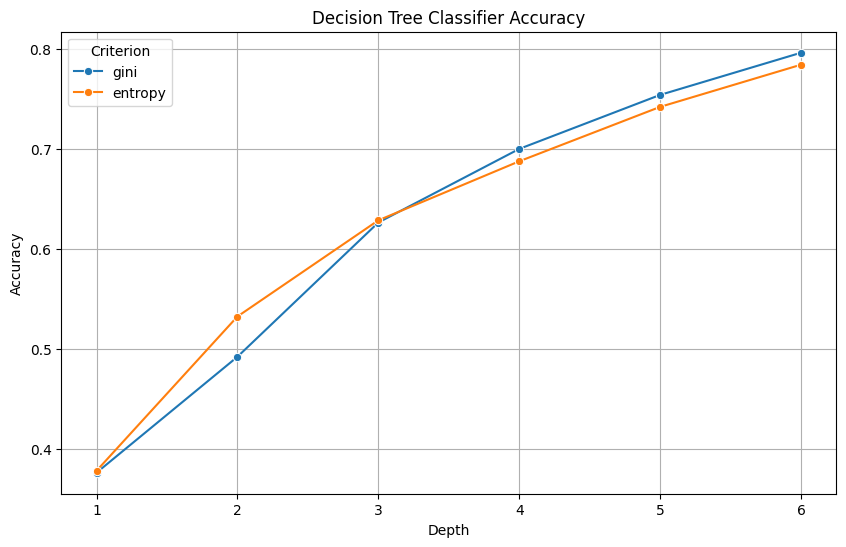

In [57]:
# plot accuracies
plt.figure(figsize=(10, 6))

sns.lineplot(x=[depth for _, depth in scores.keys()], y=scores.values(), hue=[criterion for criterion, _ in scores.keys()], marker='o')
plt.title('Decision Tree Classifier Accuracy')
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.legend(title='Criterion')
plt.grid()
plt.show()

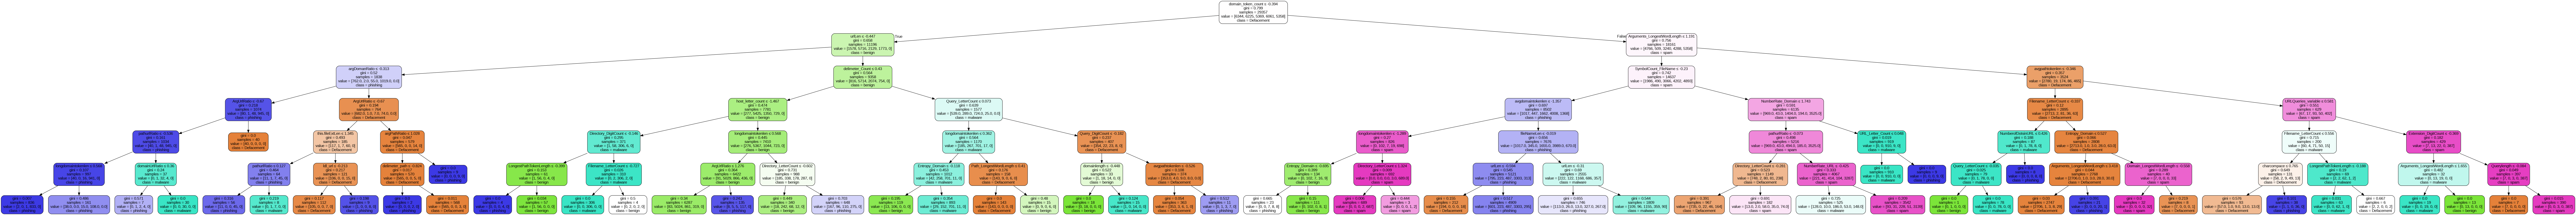

In [58]:
# Visualize the best model
best_criterion, best_depth = max(scores, key=scores.get)
best_clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(max_depth=best_depth, criterion=best_criterion, random_state=RANDOM_STATE))
])
best_clf.fit(X_train, y_train)
best_tree = best_clf.named_steps['classifier']

dot_data = export_graphviz(best_tree, out_file=None,
                           feature_names=X_train.columns,
                           class_names=le.classes_,
                           filled=True, rounded=True,
                           special_characters=True)
graph = graphviz.Source(dot_data)
graph.render("decision_tree", format='png', cleanup=True)
display(Image(filename='decision_tree.png'))

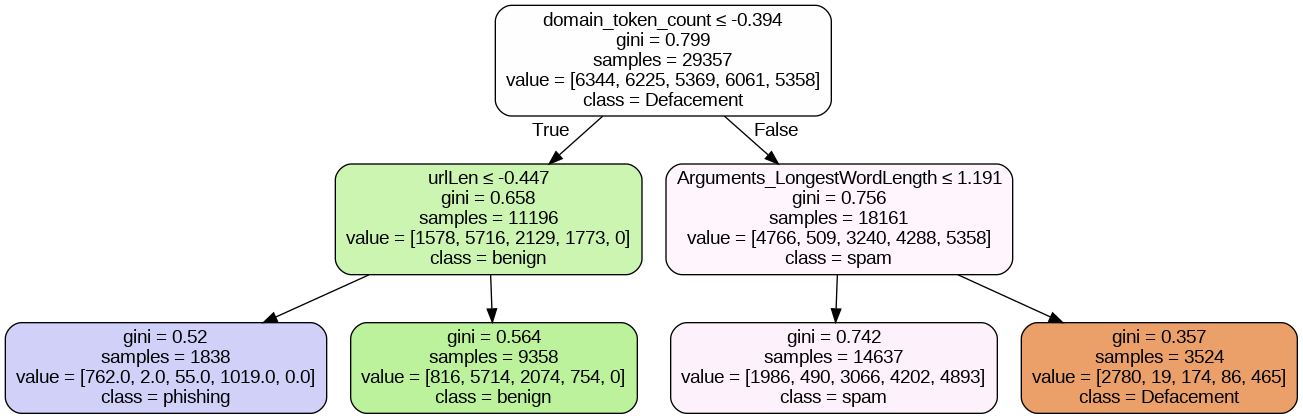

In [59]:
# Visualize tree with depth 2
clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(max_depth=2, criterion='gini', random_state=RANDOM_STATE))
])
clf.fit(X_train, y_train)
tree = clf.named_steps['classifier']
dot_data = export_graphviz(tree, out_file=None,
                           feature_names=X_train.columns,
                           class_names=le.classes_,
                           filled=True, rounded=True,
                           special_characters=True)
graph = graphviz.Source(dot_data)
graph.render("decision_tree2", format='png', cleanup=True)
display(Image(filename='decision_tree2.png'))

The decision tree shows how different URL features help separate benign and malicious sites. The first split is based on domain_token_count, which distinguishes defacement URLs from others. URLs with shorter lengths tend to be benign or phishing, while those with longer argument words are often classified as spam. Overall, the model uses structural patterns like domain complexity and URL length to identify different types of threats effectively.